In [4]:
import pandas as pd
import matplotlib.pyplot as plt

gdp = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita",index_col=1)[2]
gdp = gdp["Int$"].to_frame()
gdp=gdp.drop(["World[n 1]"])
gdp

,Rank,Country/Territory,Int$
0,1,Qatar,138910.0
1,—,Macau,113352.0
2,2,Luxembourg,112045.0
3,3,Singapore,105689.0
4,4,Ireland,86988.0
...,...,...,...
188,183,"Congo, Democratic Republic of the",873.0
189,184,Central African Republic,864.0
190,185,Burundi,724.0
191,—,Syria,NaN


In [3]:
happiness = pd.read_html("https://en.wikipedia.org/wiki/World_Happiness_Report")[4]
happiness = happiness.set_index('Country or region')
happiness = happiness["Score"].to_frame()
happiness

,Score
Country or region,
Finland,7.769
Denmark,7.600
Norway,7.554
Iceland,7.494
Netherlands,7.488
...,...
Rwanda,3.334
Tanzania,3.231
Afghanistan,3.203


In [4]:
life = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy", header=0, index_col=0)[0]
life = life["Both sexes lifeexpectancy"].to_frame()
life

,Both sexes lifeexpectancy
Country and regions,
Japan,83.7
Switzerland,83.4
Singapore,83.1
Australia,82.8
Spain,82.8
...,...
Cote d'Ivoire,53.3
Chad,53.1
Central African Republic,52.5


In [13]:
birth = pd.read_html("https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_by_birth_rate", index_col = 0, header = 0)[1]
birth = birth["CIA WF 2016"].to_frame()
birth = birth[2:]
birth

,CIA WF 2016
Country/territory,
Afghanistan,38.3
Albania,13.1
Algeria,23
Andorra,7.8
Angola,38.6
...,...
Tokelau (New Zealand),NaN
Turks and Caicos Islands (UK),NaN
U.S. Virgin Islands,NaN


In [12]:
result = pd.concat([gdp, happiness, life, birth], axis=1, sort=False)
result = result.rename(columns={"Int$": "GDP (PPP) per capita", "CIA WF 2016" : "Birth rate", "Both sexes lifeexpectancy" : "Life expectancy", "Score" : "Happiness score"})
result.sort_index(inplace=True)
result

,GDP (PPP) per capita,Happiness score,Life expectancy,Birth rate
Afghanistan,2017.0,3.203,60.5,38.3
Albania,13345.0,4.719,77.8,13.1
Algeria,15440.0,5.211,75.6,23
American Samoa,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,7.8
...,...,...,...,...
Wallis and Futuna (France),NaN,NaN,NaN,NaN
Western Sahara (Sahrawi),NaN,NaN,NaN,29.8
Yemen,2377.0,3.380,65.7,29.2
Zambia,4104.0,4.107,61.8,41.8


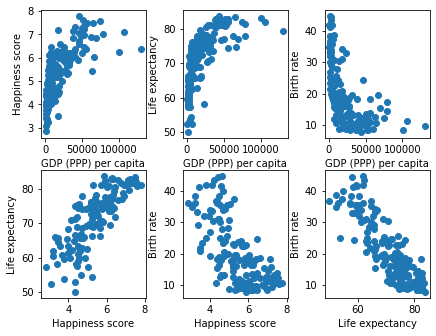

In [14]:
with open('countrydata.html', 'w') as file:
    result.to_html(file)
with open('countrydata.csv', 'w') as file:
    result.to_csv(file)
with open('countrydata.json', 'w') as file:
    result.to_json(file)
with open('countrydata.json', 'r') as file:
    data = pd.read_json(file)

birth_rates = (data["Birth rate"])
gdps = (data["GDP (PPP) per capita"])
life_exps = (data["Life expectancy"])
happines_scores = (data["Happiness score"])

plt.subplot(231)
plt.scatter(gdps, happines_scores)
plt.xlabel("GDP (PPP) per capita")
plt.ylabel("Happiness score")

plt.subplot(232)
plt.scatter(gdps, life_exps)
plt.xlabel("GDP (PPP) per capita")
plt.ylabel("Life expectancy")

plt.subplot(233)
plt.scatter(gdps, birth_rates)
plt.xlabel("GDP (PPP) per capita")
plt.ylabel("Birth rate")

plt.subplot(234)
plt.scatter(happines_scores, life_exps)
plt.xlabel("Happiness score")
plt.ylabel("Life expectancy")

plt.subplot(235)
plt.scatter(happines_scores, birth_rates)
plt.xlabel("Happiness score")
plt.ylabel("Birth rate")

plt.subplot(236)
plt.scatter(life_exps, birth_rates)
plt.xlabel("Life expectancy")
plt.ylabel("Birth rate")

plt.subplots_adjust(top=1.0, bottom=0.0, left=0.10, right=1.0, hspace=0.25, wspace=0.35)
plt.savefig("countryplots.png")
plt.show()

In [9]:
print("Figure 1 PCC: "+str(gdps.corr(happines_scores, method='pearson')))
print("Figure 2 PCC: "+str(gdps.corr(life_exps, method='pearson')))
print("Figure 3 PCC: "+str(gdps.corr(birth_rates, method='pearson')))
print("Figure 4 PCC: "+str(happines_scores.corr(life_exps, method='pearson')))
print("Figure 5 PCC: "+str(happines_scores.corr(birth_rates, method='pearson')))
print("Figure 6 PCC: "+str(life_exps.corr(birth_rates, method='pearson')))

Figure 1 PCC: 0.706900594652787
Figure 2 PCC: 0.6735427019287419
Figure 3 PCC: -0.5847942105039692
Figure 4 PCC: 0.7930517042665635
Figure 5 PCC: -0.687433062525223
Figure 6 PCC: -0.8571781345329883
